# Data Collection

I haved used [Spotipy](https://github.com/plamere/spotipy), a lightweight Python library for the Spotify Web API, to pull the songs from my playlists as well as other playlists.

In [1]:
SPOTIPY_CLIENT_ID = "c56c6dc34ff3437ca523b966926c23e7"
SPOTIPY_CLIENT_SECRET = "58c26f3d21264d7d92c35cf9870afd34"

In [2]:
import pandas as pd 
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
cid = SPOTIPY_CLIENT_ID
secret = SPOTIPY_CLIENT_SECRET
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 

This function takes a playlist id (manually found through spotify) and creates a dataframe with the list of songs
and their audio features.

In [3]:
def make_playlist_data(playlist_id, genre = 'me'):
    '''This function takes a playlist id (manually found through spotify) and creates a dataframe 
    with the list of songs and their audio features.'''
    
    playlist = sp.user_playlist("22w53xsajnmjny5ggyjpyxt6y", playlist_id) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    for i in range(len(songs)): 
        ids.append(songs[i]["track"]["id"]) 
    features = sp.audio_features(ids) 
    df = pd.DataFrame(features)
    name = []
    artist = []
    popularity = []
    for i in range(len(songs)): 
        name.append(songs[i].get('track').get('name'))
        artist.append(songs[i].get('track').get('artists')[0].get('name'))
        popularity.append(songs[i].get('track').get('popularity'))
    df['name'] = name
    df['artist'] = artist
    df['popularity'] = popularity
    data = df[['name','artist','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','valence','speechiness','tempo','time_signature','popularity']]
    data['genre'] = genre
    return data

Now I am requesting the songs from my playlists, ~150 songs from the 7 big genres I can think of, and the top 50 songs in the United States today.

In [6]:
## my playlists
three = make_playlist_data("1w033rwlgGOWQdGWcgKmNn")
best = make_playlist_data("4St69DwMYgejHyE7B57rcx")
four = make_playlist_data('6NclpvaNFLRHRp9kVcHB02')
five = make_playlist_data('3SdWHlkPcw3uJr9lwCvj7n')
nostalgic = make_playlist_data('5En6sz4WgKj62csxF28tKW')
## US Top 50 
USTOP50 = make_playlist_data('37i9dQZEVXbLRQDuF5jeBp', 'Top50')

/Users/sammyvarma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
## spotify playlists by genre
soft_pop_hits = make_playlist_data('37i9dQZF1DWTwnEm1IYyoj', 'pop')
pumped_pop = make_playlist_data('37i9dQZF1DX5gQonLbZD9s', 'pop')
pop_party = make_playlist_data('37i9dQZF1DWXti3N4Wp5xy','pop')
rap_caviar =  make_playlist_data('37i9dQZF1DX0XUsuxWHRQd', 'hiphop')
get_turnt = make_playlist_data('37i9dQZF1DWY4xHQp97fN6', 'hiphop')
hip_hop = make_playlist_data('37i9dQZF1DX7Mq3mO5SSDc', 'hiphop')
hot_country = make_playlist_data('37i9dQZF1DX1lVhptIYRda', 'country')
more_country = make_playlist_data('37i9dQZF1DWTkxQvqMy4WW', 'country')
country_gold = make_playlist_data('37i9dQZF1DWYnwbYQ5HnZU', 'country')
house_music = make_playlist_data('2otQLmbi8QWHjDfq3eL0DC', 'edm')
edm = make_playlist_data('3Di88mvYplBtkDBIzGLiiM','edm')
mint = make_playlist_data('37i9dQZF1DX4dyzvuaRJ0n','edm')
RandB = make_playlist_data('37i9dQZF1DX4SBhb3fqCJd','RandB')
chilRandB = make_playlist_data('37i9dQZF1DX2UgsUIg75Vg', 'RandB')
zerosRandB = make_playlist_data('37i9dQZF1DWYmmr74INQlb' , 'RandB')
movie_music = make_playlist_data('6sNDAFPubg3k4CuyH1fqrR', 'movie')
viva_latino = make_playlist_data('37i9dQZF1DX10zKzsJ2jva', 'latin')
latinx_forever = make_playlist_data('37i9dQZF1DWVIKVPO4xOlK', 'latin')
latin_rising = make_playlist_data('37i9dQZF1DX8womvTyUjrN', 'latin')
rock = make_playlist_data('37i9dQZF1DWXRqgorJj26U','rock')
summer_rock = make_playlist_data('37i9dQZF1DWU3bkMPOyjie', 'rock')

/Users/sammyvarma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The ~150 songs from each genre will make up this dataframe and I will drop any duplicate song names that may have
appeared in multiple playlists. A different dataframe is created with just songs from my playlists using the 
exact same process

In [7]:
df = pd.concat([soft_pop_hits,pop_party,rap_caviar, get_turnt, hip_hop, hot_country,more_country, country_gold, house_music,edm,RandB,chilRandB,zerosRandB, movie_music, viva_latino,latinx_forever,latin_rising, rock, summer_rock, mint],axis=0)
df = df.drop_duplicates(subset=['name']).reset_index(drop=True)
me = pd.concat([best,three,four,five,nostalgic], axis = 0)
me = me.drop_duplicates(subset =['name']).reset_index(drop=True)
df

,name,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,valence,speechiness,tempo,time_signature,popularity,genre
0,I'm Yours,Jason Mraz,0.595000,0.686,242187,0.457,0.000000,11,0.1050,-8.322,1,0.718,0.0468,150.953,4,82,pop
1,Memories,Maroon 5,0.837000,0.764,189486,0.320,0.000000,11,0.0822,-7.209,1,0.575,0.0546,91.019,4,89,pop
2,Someone You Loved,Lewis Capaldi,0.751000,0.501,182161,0.405,0.000000,1,0.1050,-5.679,1,0.446,0.0319,109.891,4,81,pop
3,Perfect,Ed Sheeran,0.163000,0.599,263400,0.448,0.000000,8,0.1060,-6.312,1,0.168,0.0232,95.050,3,86,pop
4,Shallow - Radio Edit,Lady Gaga,0.416000,0.575,217213,0.330,0.000000,7,0.0872,-6.557,1,0.277,0.0310,95.801,4,78,pop
5,This City,Sam Fischer,0.731000,0.602,194853,0.377,0.000000,11,0.0808,-6.213,1,0.518,0.0446,73.877,4,84,pop
6,I'm Not The Only One,Sam Smith,0.554000,0.453,239317,0.496,0.000027,5,0.0772,-5.785,1,0.501,0.0453,80.994,4,0,pop
7,All of Me,John Legend,0.922000,0.422,269560,0.264,0.000000,8,0.1320,-7.064,1,0.331,0.0322,119.930,4,86,pop
8,Take Me to Church,Hozier,0.637000,0.575,241693,0.664,0.000000,4,0.1160,-5.303,0,0.437,0.0481,129.070,4,68,pop
9,Walk Me Home,P!nk,0.051900,0.652,177391,0.453,0.000000,1,0.1790,-6.119,1,0.432,0.0445,88.038,3,69,pop


# Exploratory Data Analysis (Visualizations)

In [8]:
df.groupby('genre').mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,valence,speechiness,tempo,time_signature,popularity
genre,,,,,,,,,,,,,,
RandB,0.275104,0.619218,220475.747899,0.558462,0.001747,5.117647,0.173833,-7.088849,0.495798,0.457312,0.114679,120.251798,3.907563,61.243697
country,0.179947,0.583228,203347.802395,0.728760,0.001274,5.904192,0.166575,-5.353509,0.910180,0.572102,0.041766,122.304713,3.976048,55.251497
edm,0.098622,0.665338,190298.542857,0.780324,0.093445,5.223810,0.198357,-5.855376,0.533333,0.470306,0.065977,123.685062,4.000000,58.661905
hiphop,0.105101,0.784926,202507.085227,0.641261,0.008116,5.403409,0.189647,-7.274500,0.534091,0.526428,0.244270,123.633790,3.982955,65.073864
latin,0.252178,0.714479,218221.982036,0.677569,0.004887,5.706587,0.177252,-5.730892,0.544910,0.641184,0.118181,123.141731,3.988024,63.419162
movie,0.755664,0.302365,226899.400000,0.206748,0.758303,4.510000,0.122223,-18.054590,0.650000,0.137216,0.044831,104.794590,3.630000,33.520000
pop,0.262798,0.670779,216062.138462,0.616697,0.006241,5.451282,0.157537,-6.074831,0.651282,0.505916,0.073942,114.661933,3.958974,70.707692
rock,0.125808,0.535613,249068.017857,0.780714,0.043717,4.934524,0.199498,-6.879875,0.750000,0.615310,0.066186,128.243000,3.970238,54.380952


In [9]:
df['genre'].value_counts()

edm        210
pop        195
hiphop     176
rock       168
latin      167
country    167
RandB      119
movie      100
Name: genre, dtype: int64

In [44]:
me

,name,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,valence,speechiness,tempo,time_signature,popularity,genre
0,Castle on the Hill,Ed Sheeran,0.02320,0.461,261154,0.834,0.000011,2,0.1400,-4.868,1,0.471,0.0989,135.007,4,78,me
1,Dive,Ed Sheeran,0.35500,0.761,238440,0.386,0.000000,4,0.0953,-6.158,1,0.526,0.0399,134.943,3,75,me
2,Shape of You,Ed Sheeran,0.58100,0.825,233713,0.652,0.000000,1,0.0931,-3.183,0,0.931,0.0802,95.977,4,85,me
3,Barcelona,Ed Sheeran,0.44800,0.747,191147,0.760,0.000000,1,0.1530,-4.294,1,0.682,0.1870,99.975,4,68,me
4,Supermarket Flowers,Ed Sheeran,0.91400,0.589,221107,0.242,0.000000,6,0.0887,-10.517,1,0.257,0.0442,89.749,4,78,me
5,Die A Happy Man,Thomas Rhett,0.41800,0.595,227427,0.389,0.000001,2,0.1160,-9.245,1,0.400,0.0349,166.052,4,75,me
6,Man in the Mirror - Remastered Version,Michael Jackson,0.44300,0.803,319493,0.813,0.000010,8,0.1110,-4.889,1,0.264,0.0362,100.339,4,53,me
7,Don't Wanna Know,Maroon 5,0.35600,0.777,214480,0.627,0.000000,7,0.0956,-6.142,1,0.444,0.0792,100.054,4,1,me
8,Bailando - Spanish Version,Enrique Iglesias,0.04260,0.723,243413,0.777,0.000004,7,0.0451,-3.503,1,0.961,0.1080,91.017,4,68,me
9,See You Again (feat. Charlie Puth),Wiz Khalifa,0.36900,0.689,229526,0.481,0.000001,10,0.0649,-7.503,1,0.283,0.0815,80.025,4,1,me


In [10]:
USTOP50

,name,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,valence,speechiness,tempo,time_signature,popularity,genre
0,positions,Ariana Grande,0.46800,0.737,172325,0.802,0.000000,0,0.0931,-4.771,1,0.6820,0.0878,144.015,4,87,Top50
1,"Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money,0.25000,0.800,195429,0.658,0.000000,1,0.1110,-6.142,0,0.4620,0.0790,140.042,4,90,Top50
2,Dakiti,Bad Bunny,0.40100,0.731,205090,0.573,0.000052,4,0.1130,-10.059,0,0.1450,0.0544,109.928,4,93,Top50
3,WAP (feat. Megan Thee Stallion),Cardi B,0.01940,0.935,187541,0.454,0.000000,1,0.0824,-7.509,1,0.3570,0.3750,133.073,4,97,Top50
4,For The Night (feat. Lil Baby & DaBaby),Pop Smoke,0.11400,0.823,190476,0.586,0.000000,6,0.1930,-6.606,0,0.3470,0.2000,125.971,4,95,Top50
5,Mood (feat. iann dior),24kGoldn,0.22100,0.700,140526,0.722,0.000000,7,0.2720,-3.558,0,0.7560,0.0369,90.989,4,100,Top50
6,34+35,Ariana Grande,0.23700,0.830,173711,0.585,0.000000,0,0.2480,-6.476,1,0.4850,0.0940,109.978,4,89,Top50
7,What You Know Bout Love,Pop Smoke,0.65000,0.709,160000,0.548,0.000002,10,0.1330,-8.493,1,0.5430,0.3530,83.995,4,95,Top50
8,Laugh Now Cry Later (feat. Lil Durk),Drake,0.24400,0.761,261493,0.518,0.000035,0,0.1070,-8.871,1,0.5220,0.1340,133.976,4,94,Top50
9,FDT,YG,0.17200,0.800,226640,0.510,0.000000,8,0.2590,-7.201,1,0.1460,0.4970,96.690,4,64,Top50


Text(32.271796875000014, 0.5, 'Speechiness')

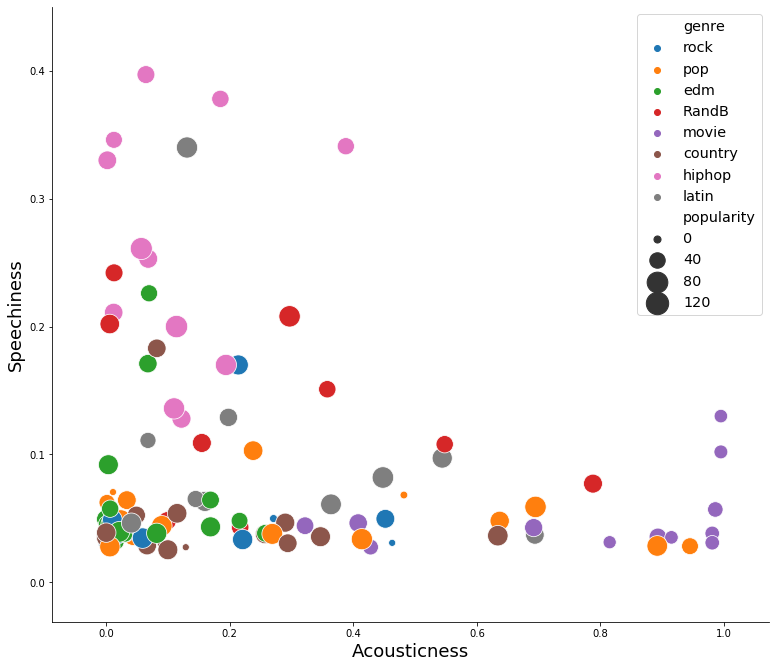

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(
    data=df.sample(100),
    x="acousticness", y="speechiness",
    hue="genre", size="popularity",
    sizes=(50, 500)
)
g.fig.set_size_inches(15,10)
g._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')
plt.xlabel('Acousticness', fontsize=18)
plt.ylabel('Speechiness', fontsize=18)

Text(33.535078125, 0.5, 'loudness')

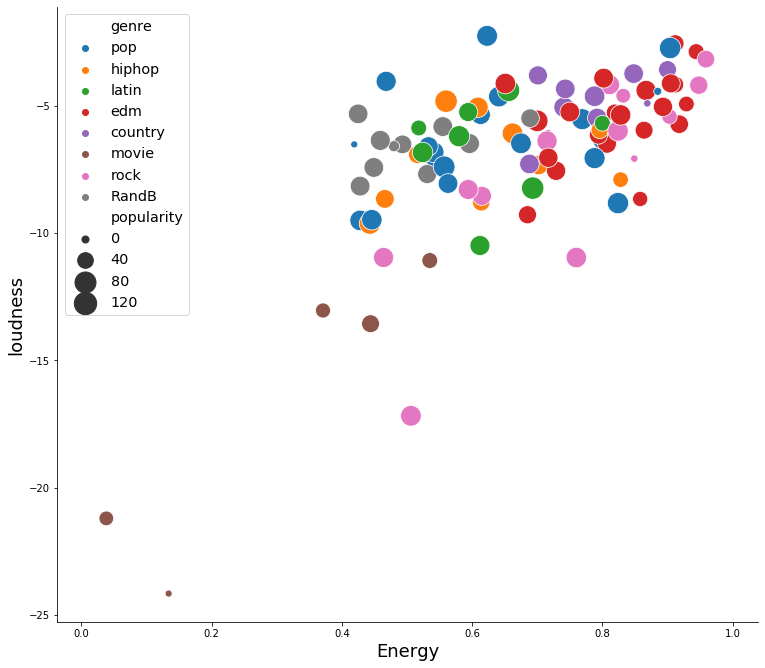

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(
    data=df.sample(100),
    x="energy", y="loudness",
    hue="genre", size="popularity",
    sizes=(50, 500)
)
g.fig.set_size_inches(15,10)
g._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')
plt.xlabel('Energy', fontsize=18)
plt.ylabel('Loudness', fontsize=18)

Text(32.271796875000014, 0.5, 'Liveness')

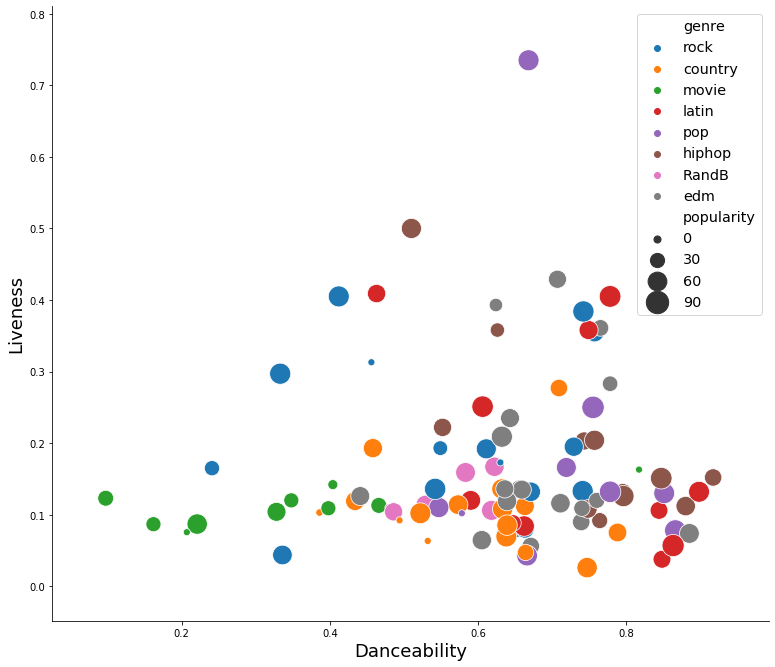

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(
    data=df.sample(100),
    x="danceability", y="liveness",
    hue="genre", size="popularity",
    sizes=(50, 500)
)
g.fig.set_size_inches(15,10)
g._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')
plt.xlabel('Danceability', fontsize=18)
plt.ylabel('Liveness', fontsize=18)